## Introduction 

We will be looking to predict customer churn for the orange telecom data. The data consists of 5000 observations of customers and  has 20 features with the explanatory varible being whether or not a customer churned. 

We will be looking to compare the performance of linear classification models i.e logistic regression vs that of non-linear models such as Support Vector Machines (rbf kernel) and Random Forests among others. 

## Loading Libraries 

In [2]:
# Impoting general libraries
import warnings
import itertools
import random

# Data Analysis Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import missingno as msno

# Data Preparation, Modeling, and Evaluation (SKLearn Modules)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler,RobustScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

# Class Imbalance
# from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Machine Learning Models 
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

# Machine Learning Model Evaluation Methods 
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

warnings.filterwarnings(action="ignore")
%matplotlib inline

## Loadidng the Data and Getting to know my Data 

In [4]:
#Import and visualise data columns
data = pd.read_csv('Orange_Telecom_Churn_Data.csv')
data.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   object 
 4   intl_plan                      5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

In [69]:
data.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,436.911400,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,42.209182,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,415.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,415.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,510.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Insights from Basic Data Analysis:
1. No missing values
2. We  have some features that are categorical data and some are floats
3. Label is a discrete variable (classification problem)
4. We have some extra features which are not relevent for building a machine learning model (need to remove them)

## Prelim Pre-processing

In [5]:
# Remove extraneous columns
data.drop(['state', 'area_code', 'phone_number'], axis=1, inplace=True)

In [7]:
# Separating the numerical variables from the categorical variables. 
num_var=data.select_dtypes(include=[np.number])
# cat_var=data.select_dtypes(include=[np.object])

In [72]:
cat_var.head()
# num_var.head()

,intl_plan,voice_mail_plan
0,no,yes
1,no,yes
2,no,no
3,yes,no
4,yes,no


In [73]:
print(num_var.shape)
num_var.head()

(5000, 15)


,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [74]:
# Convert the explanatory variable to a binary from bool
data.churned = data.churned.astype(int)
data.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## EDA

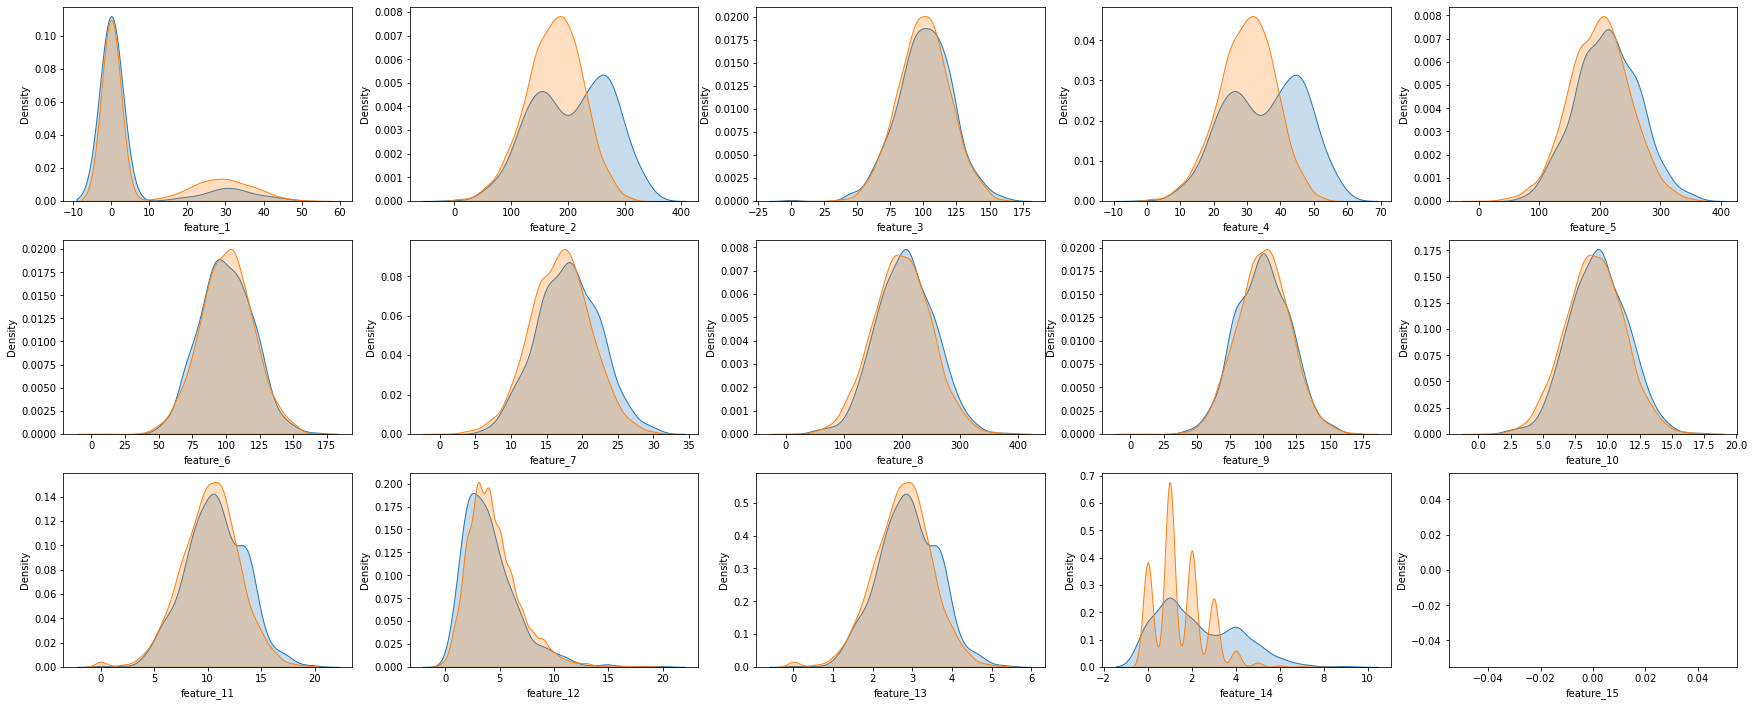

In [75]:
#Univariate Data Analysis (Kernel Density Estimate) for the numerical variables 

num_var=data.select_dtypes(include=[np.number])

fig = plt.figure(figsize=(30,25))
for i in range(1,len(num_var.columns)):
    ax = fig.add_subplot(6,5, i)
    sns.kdeplot(data[num_var.columns[i]][num_var.churned==True], label='Churned', shade=True)
    sns.kdeplot(data[num_var.columns[i]][num_var.churned==False], label='Did not Churn', shade=True)
    plt.xlabel("feature_" + str(i))
    

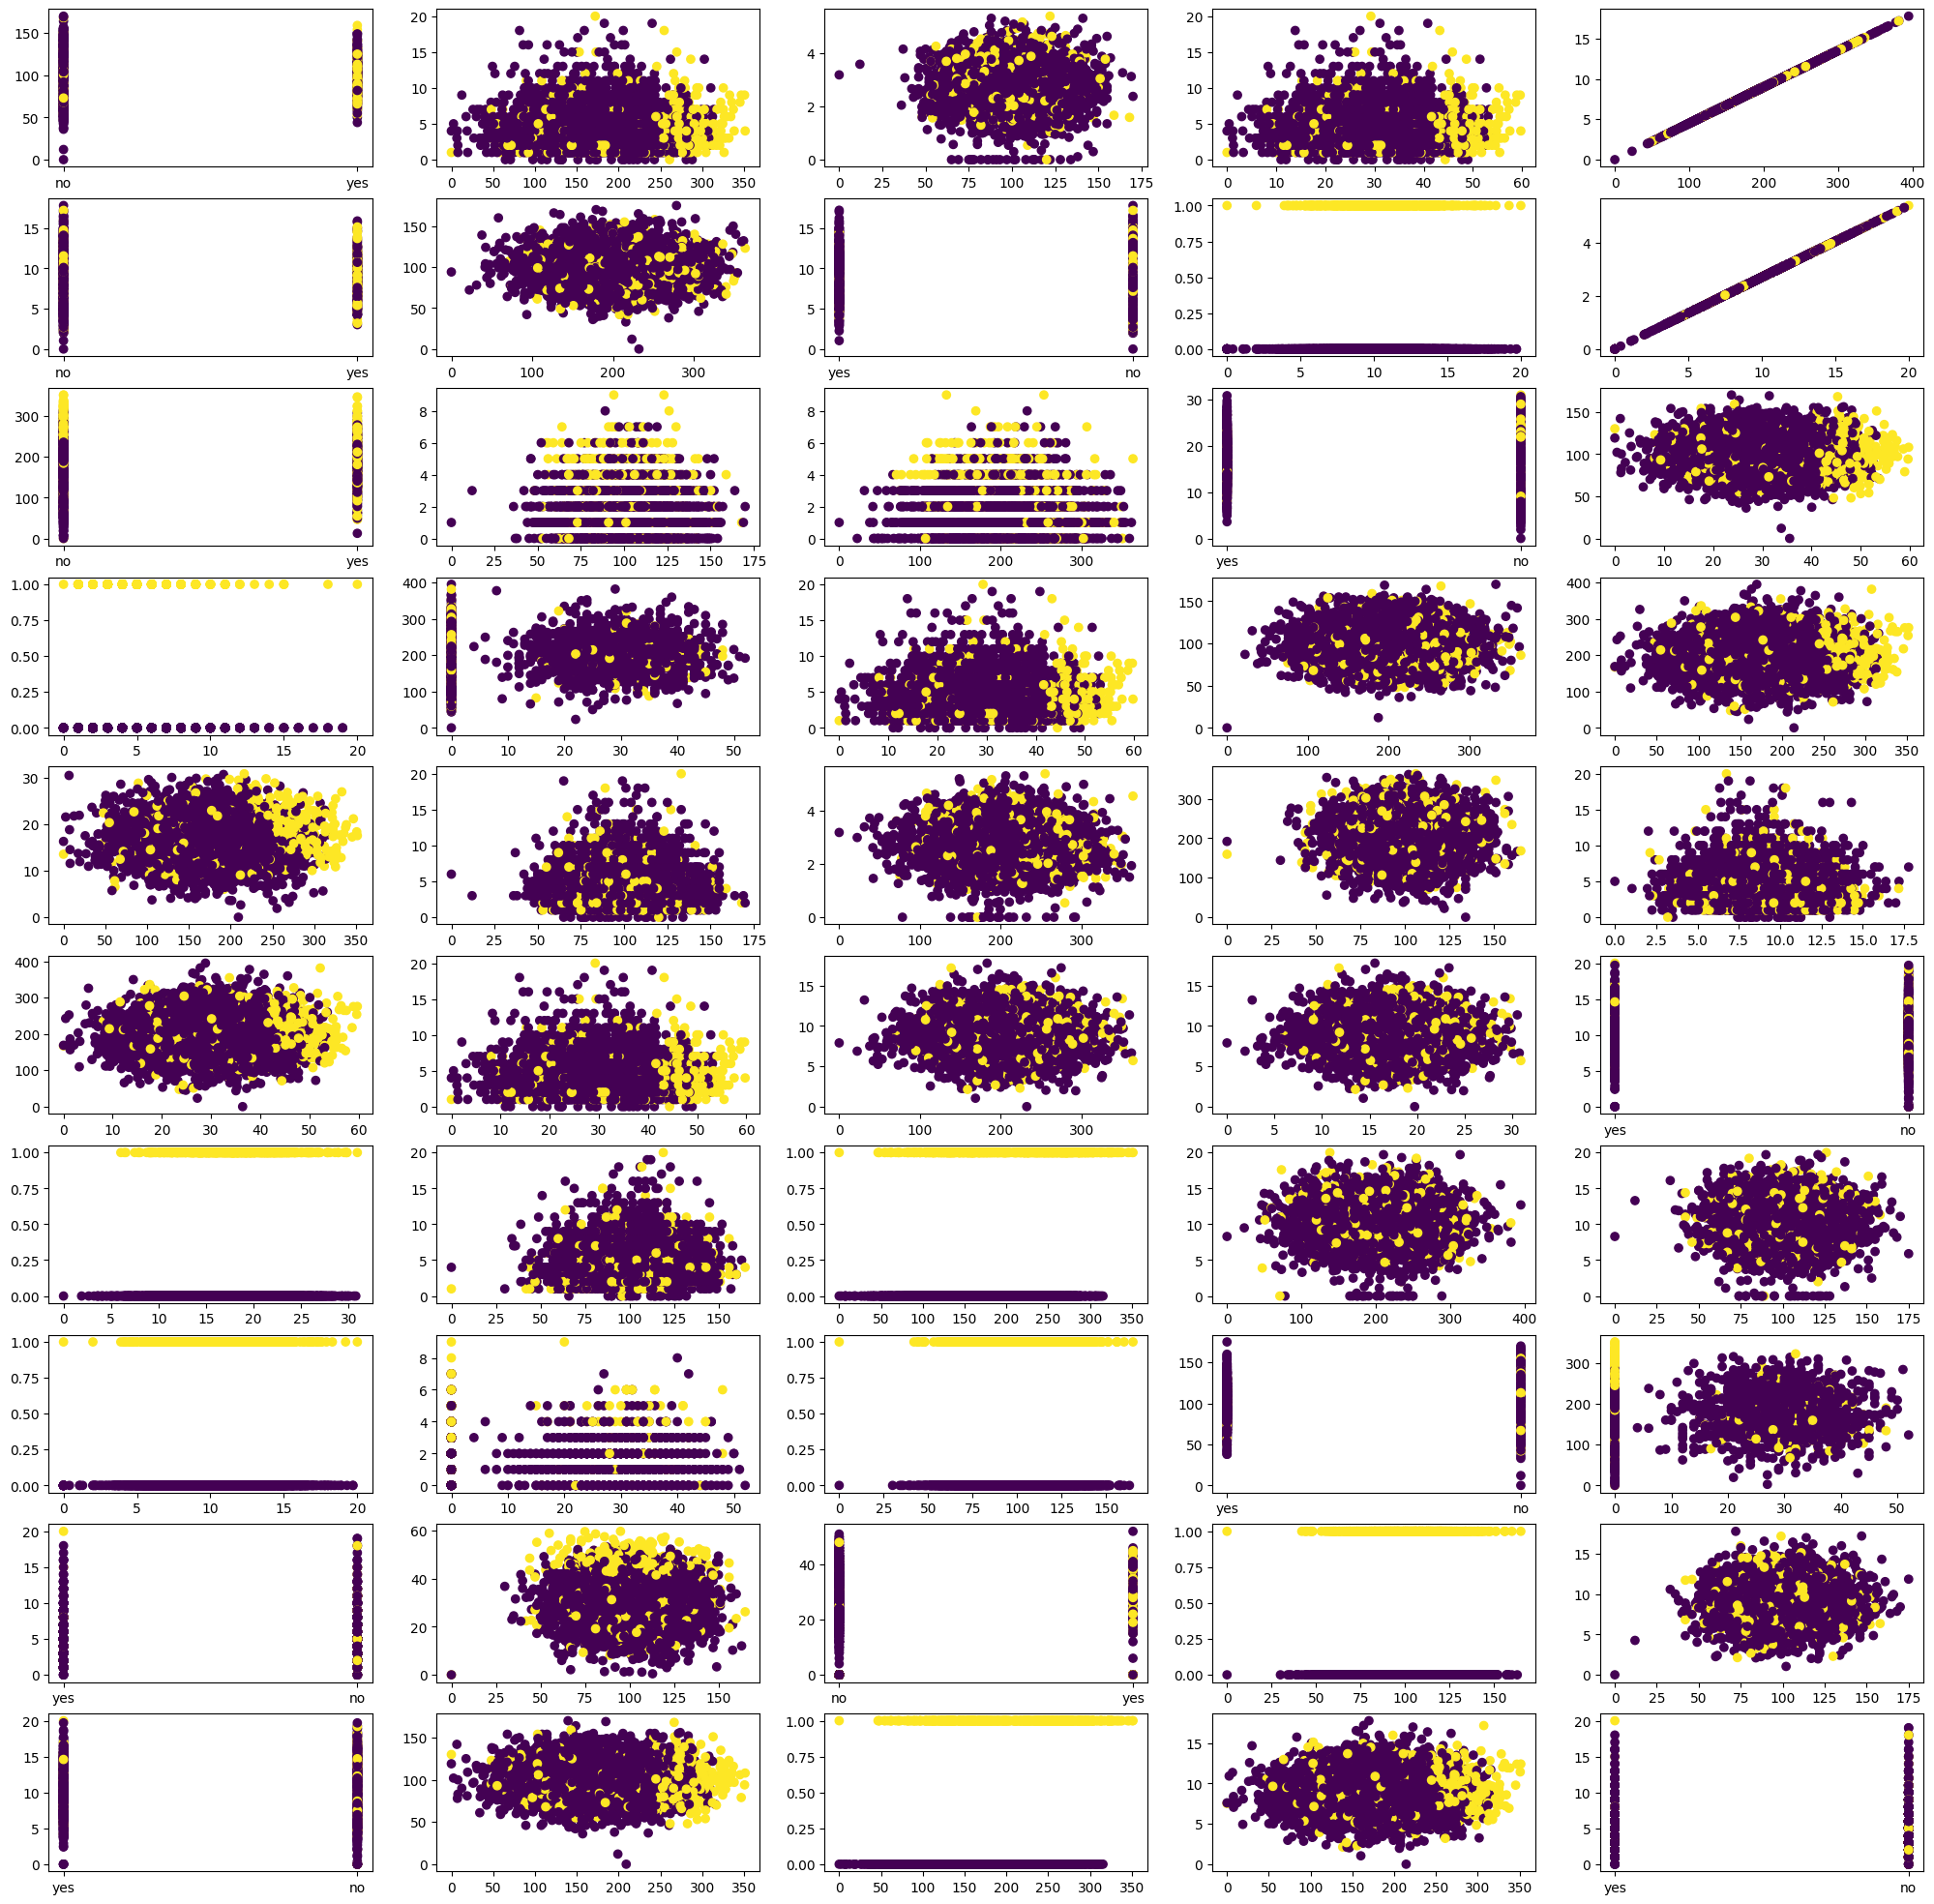

In [8]:
#Bivariate Data Analysis (Scatter Plots)
comb = list(itertools.combinations([a for a in range(1, len(data.columns))], 2)) #Create combinations of all features, in twos (bivariate)
rand = random.choices(comb, k=50) 

fig = plt.figure(figsize=(25,25))
for i in range(len(rand)):
    ax = fig.add_subplot(10,5, i+1)
    plt.scatter(data[data.columns[rand[i][0]]],data[data.columns[rand[i][1]]],c=data.churned)


### Insights from Exploratory Data Analysis:
1. Most data features are not linearly separable for the classification problem as seen from bivariate scatter plots and the univariate KDE plot
2. **Inituition:** Support Vector Machines and Ensemble Methods would probably be the models for this data as they can work non-linear separations

Text(0.5, 1.0, 'Ratio of Customers Who churned and Who did Not')

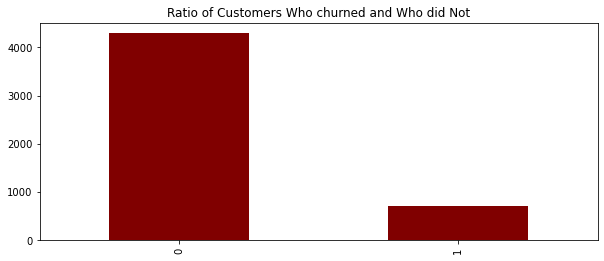

In [ ]:
data.churned.value_counts().plot(kind = "bar", figsize = (10,4),color='Maroon')
plt.title("Ratio of Customers Who churned and Who did Not")

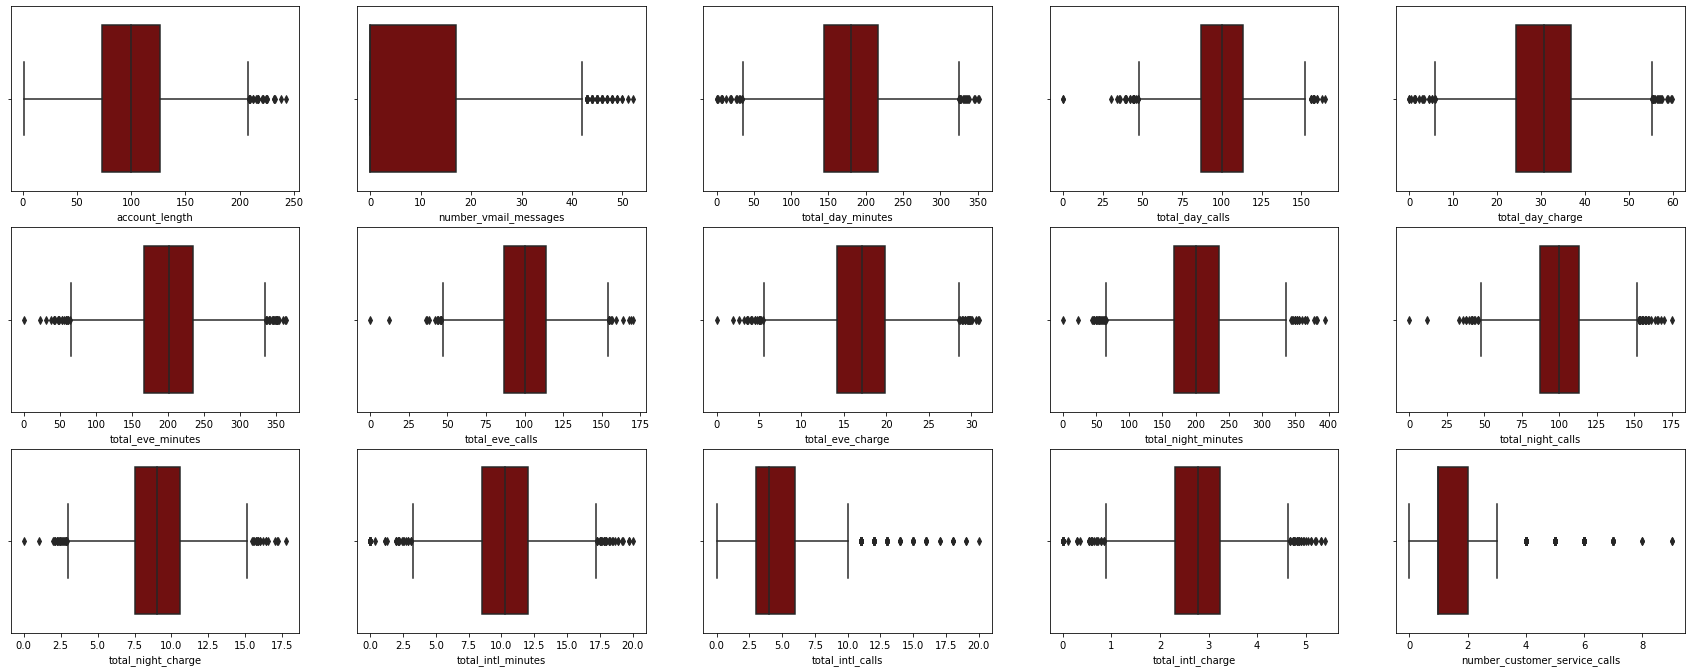

In [ ]:
# Unitvariate analysis of all the numerical variables - we are trying to see if there are outliers. 
fig = plt.figure(figsize=(30,40))
for i,j in zip(num_var,range(15)): 
    ax = fig.add_subplot(10,5, j+1)
    sns.boxplot(data=data,x=data[i],orient='v',color="Maroon")

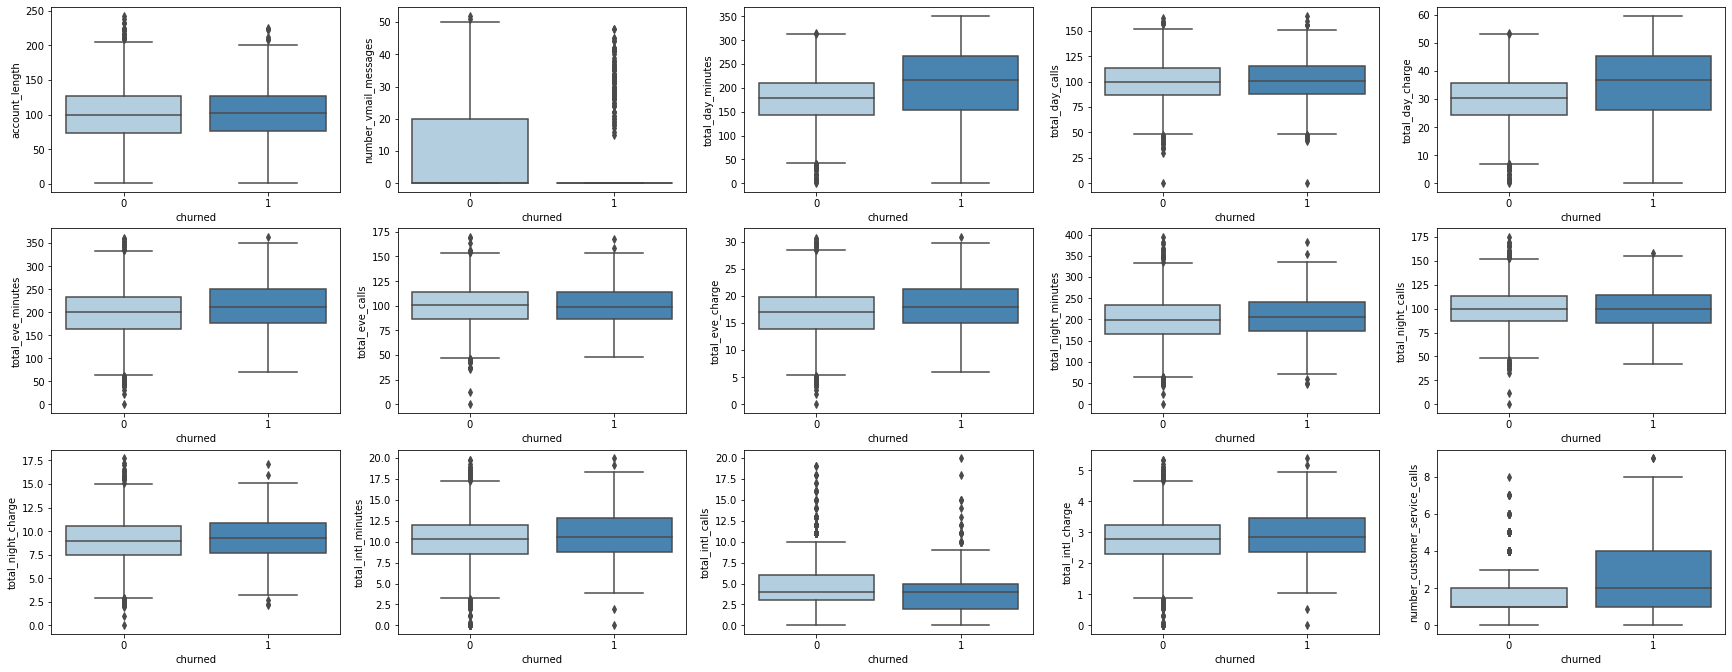

In [ ]:
fig = plt.figure(figsize=(30,40))
for i,j in zip(num_var,range(15)): 
    ax = fig.add_subplot(10,5, j+1)
    sns.boxplot(data=data,x=data.churned,y=data[i],orient='v',palette='Blues')

### Insights from Exploratory Data Analysis:
1. Most of the numerical variables have outliers 
2. **Inituition:** We will need a model that is to outliers or may need to treat the outliers, before modelling

## Data Preparation

In [ ]:

# Label Binarization 
lb = LabelBinarizer()
for col in cat_var.columns: 
    data[col] = lb.fit_transform(data[col])

# data.intl_plan.value_counts()
# data.voice_mail_plan.value_counts()

# Separate the label from the features 
X= [x for x in data.columns if x != 'churned']
y = data['churned']

X = data[X]
print(X.shape,y.shape)

# Feature Scaling : Because we have different measurement values. 

## Essential for any distance-based algorithms to be implemented (KNN)
## We are not going to normalisaton because we have 
scaler = StandardScaler()
X_scaled  = scaler.fit_transform(X)
X_scaled[:5]

(5000, 17) (5000,)


array([[ 0.69894149, -0.32324017,  1.66712012,  1.27314513,  1.57380195,
         0.50282376,  1.57407401, -0.06403165, -0.06007714, -0.06384907,
         0.87699882, -0.44692782,  0.87628638, -0.09480937, -0.58423577,
        -0.0955088 , -0.43667564],
       [ 0.16984882, -0.32324017,  1.66712012,  1.3469729 , -0.34680162,
         1.1584221 , -0.34708166, -0.10162098,  0.14169327, -0.10108943,
         1.06899159,  0.1543743 ,  1.06981758,  1.24522677, -0.58423577,
         1.24598231, -0.43667564],
       [ 0.92569549, -0.32324017, -0.5998368 , -0.57254912,  1.17112468,
         0.70454633,  1.17128626, -1.57156177,  0.49479147, -1.57208375,
        -0.74801214,  0.20448281, -0.7467366 ,  0.70196888,  0.22991664,
         0.69597096, -1.20223603],
       [-0.40963362,  3.09367492, -0.5998368 , -0.57254912,  2.21029182,
        -1.46397128,  2.21045683, -2.74474467, -0.61494575, -2.74515517,
        -0.06910988, -0.54714485, -0.06937742, -1.32619393,  1.04406906,
        -1.32968063

In [ ]:
# sns.boxplot(data=pd.DataFrame(X_scaled),x=X_scaled[4],orient='v',palette='Blues')

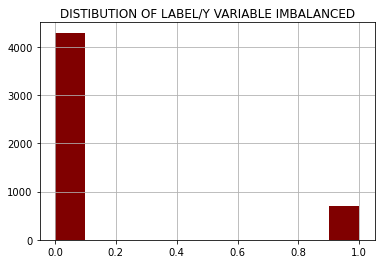

Text(0.5, 1.0, 'DISTIBUTION OF LABEL/Y VARIABLE BALANCED')

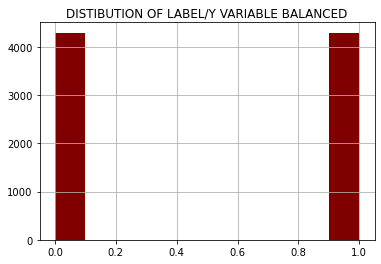

In [ ]:
# Smote - Synthetic Minority Oversampling Technique 

smote_sample=SMOTE(random_state=124,sampling_strategy='auto')
x_res, y_res=smote_sample.fit_resample(X,y)

# Showing the diferences between balanced and imbalanced data 
y.hist(color = 'Maroon')
plt.title('DISTIBUTION OF LABEL/Y VARIABLE IMBALANCED')
plt.show()

y_res.hist(color = 'Maroon')
plt.title('DISTIBUTION OF LABEL/Y VARIABLE BALANCED')

## Model Selection

In [ ]:
#Train Test Split: Reserve 30% of data for final model testing
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.30, random_state=20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6010, 17) (2576, 17) (6010,) (2576,)


### Basic Modeling with Cross-validation
In this section, we try out different classification algorithms to understand how they perform with the available data. Paramaters are manually inputed and tried to tried to optimise performance of the algorithm. In the next section, we'll then work on hyperparameter tuning on the top performing algorithms.

In [ ]:
#Logistic Regression (No Regularisation)
pipe = make_pipeline(PolynomialFeatures(degree=1), LogisticRegression(penalty='none', solver='lbfgs'))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())

[0.69550749 0.6672213  0.70382696 0.68801997 0.68635607] 0.6881863560732112


In [ ]:
# Support vector classification - RBF Kernel 
pipe = make_pipeline(PolynomialFeatures(degree=2), SVC(kernel='rbf',C=25))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())

[0.80116473 0.77204659 0.80615641 0.79783694 0.80948419] 0.7973377703826954


In [ ]:
# Support vector classification - Poly Kernel 
pipe = make_pipeline(PolynomialFeatures(degree=1), SVC(kernel='poly',C=5))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())

[0.69966722 0.67304493 0.68885191 0.69717138 0.66971714] 0.6856905158069884


In [ ]:
# Support vector classification - Linear Kernel 
pipe = make_pipeline(PolynomialFeatures(degree=2), LinearSVC(C=50))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())

[0.64475874 0.74542429 0.75956739 0.54242928 0.57737105] 0.653910149750416


In [ ]:
# classification - Random Forest 
pipe = make_pipeline(PolynomialFeatures(degree=1),RandomForestClassifier(n_estimators=1000,max_depth=10,criterion='gini'))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())

[0.89101498 0.86938436 0.87687188 0.88685524 0.88019967] 0.8808652246256239


In [ ]:
# classification - Random Forest 
pipe = make_pipeline(PolynomialFeatures(degree=1),RandomForestClassifier())
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())

[0.93094842 0.93094842 0.91181364 0.9234609  0.91930116] 0.9232945091514143


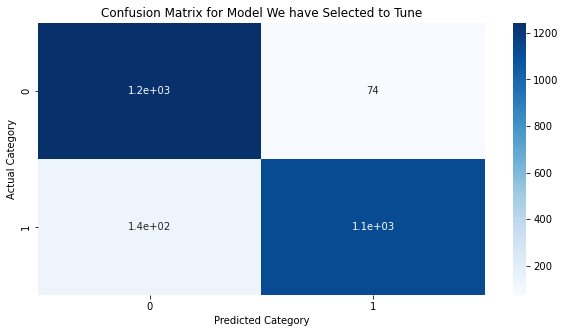

array([[1243,   74],
       [ 136, 1123]], dtype=int64)

In [ ]:
# Investigating whether class imbalance has impacted our models. 
model = RandomForestClassifier() 
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

matrix = confusion_matrix(y_test, y_pred)

#Visualise the matrix
plt.figure(figsize=(10,5))
sns.heatmap(matrix, annot=True, cmap='Blues')
plt.xlabel("Predicted Category")
plt.ylabel("Actual Category")
plt.title("Confusion Matrix for Model We have Selected to Tune")
plt.show()

matrix

## Model Evaluation - Insights 

### 1.1 Understanding the results – Support Vector Classification
From the results above, **Linear Support Vector Classfication and Logistic Regression perform poorly**. 
This further reinforces the idea that the classes are not linearly separable, an attribute observed first in the Exploratory Data Analysis section.

### 1.2 SVC with a Radial Basis Function (RBF) Kernel
The RBF kernel performs better than the polynomial kernel. This means that the radial basis function is the most ideal kernel in this classification problem 


### 1.3 Understanding the results of Random Forest 
The random forest with a gini criterion perfoms better than that using the entropy criterion. 
Random Forest performs better than all the above models. This reinforces our earlier assumption that non-linear models will perform better than linear models, given the non-linear separability in the data. We will go ahead and tune the parameters of the random forest model. 

## Model Tuning 

## Modelling with PCA

Out of the many features, we are going to select a few components based on our PCA fit to see if the model performs better.
The goal of PCA is to detect the correlation beteween variables and reduce the dimension of the data. 

In [ ]:
# Let us look at the correlation within our data. 
print(x_res.shape,y_res.shape)
print(X.shape,y.shape)
x_res.head()

(8586, 17) (8586,)
(5000, 17) (5000,)


,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [ ]:
df_all = pd.concat([x_res,y_res],axis=1)
df_all.shape

(8586, 18)

<AxesSubplot:>

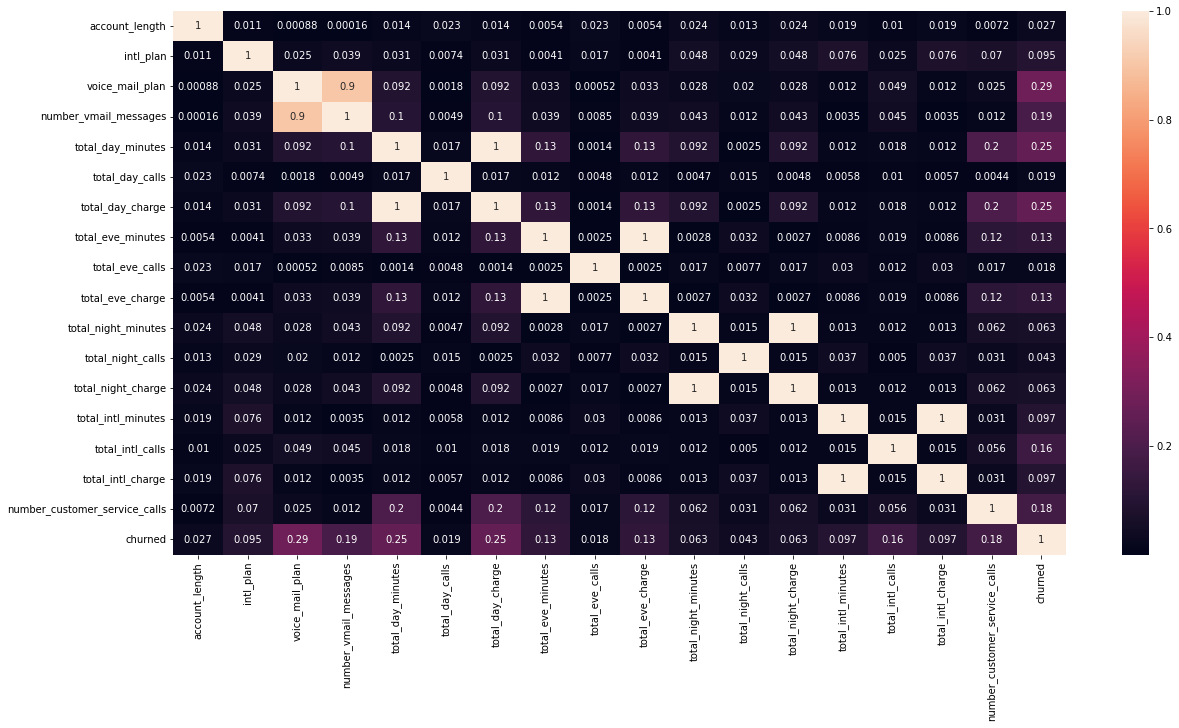

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df_all.corr().abs(),annot=True)

In [ ]:
# PCA 
from sklearn.decomposition import  PCA
pca = PCA().fit(x_res)

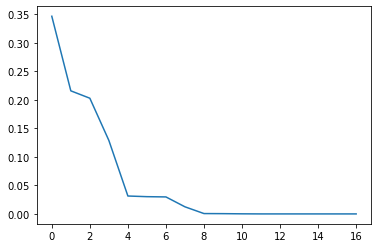

In [ ]:
pca.explained_variance_ratio_plt.plot()

Text(0.5, 1.0, 'EXPLAINED VARIANCE AS A FUNCTION OF THE NUMBER OF COMPONENTS')

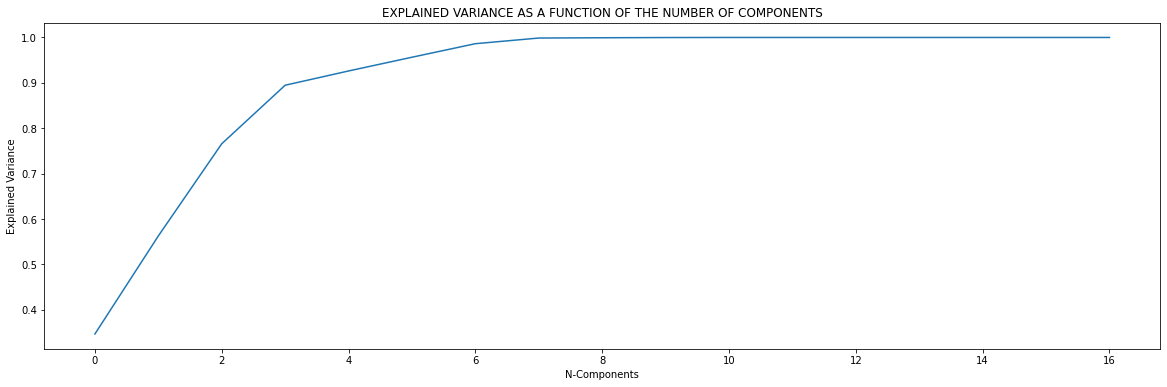

In [81]:
variance = pca.explained_variance_ratio_
components = np.arange(len(variance))

plt.figure(figsize=(20,6))
plt.plot(components, np.cumsum(variance))
plt.ylabel("Explained Variance"), plt.xlabel("N-Components")
plt.title('EXPLAINED VARIANCE AS A FUNCTION OF THE NUMBER OF COMPONENTS')

In [ ]:
# print(np.cumsum(variance))
# variance

In [92]:
# Let us verify that the choice we have made is correct 
from sklearn.decomposition import  PCA
pca_2 = PCA(n_components=7).fit(x_res)
print('Cumulative Explained variance ratio with 7 components is',np.cumsum(pca_2.explained_variance_ratio_))

Cumulative Explained variance ratio with 7 components is [0.34686623 0.56283837 0.76585476 0.89478077 0.92620406 0.95647034
 0.98628449]


In [99]:
X_pca = pca_2.transform(x_res)
pd.DataFrame(X_pca)

,0,1,2,3,4,5,6
0,-76.074854,39.114456,7.708680,27.559351,10.669886,-4.521535,3.541126
1,22.464794,31.753554,46.046877,9.793164,7.990089,-22.144852,-1.239572
2,-21.556720,55.168857,-91.174445,31.196867,2.154382,-14.678615,-10.039776
3,-64.738707,131.735114,-105.114202,-23.053094,-8.742376,29.150643,10.137872
4,41.371975,35.734388,-31.619774,-26.880275,-9.148647,-22.234390,-24.845374
...,...,...,...,...,...,...,...
8581,14.003186,19.898828,-11.854600,-29.003429,18.577849,-18.700080,3.658798
8582,-58.678301,75.480134,20.733475,49.644122,3.108179,0.731595,16.819131
8583,-75.688401,75.806191,16.292328,-25.433480,3.225895,-0.191448,-22.942454
8584,63.657914,14.416350,56.006009,27.123370,-14.043282,-0.074225,-7.860795


<AxesSubplot:>

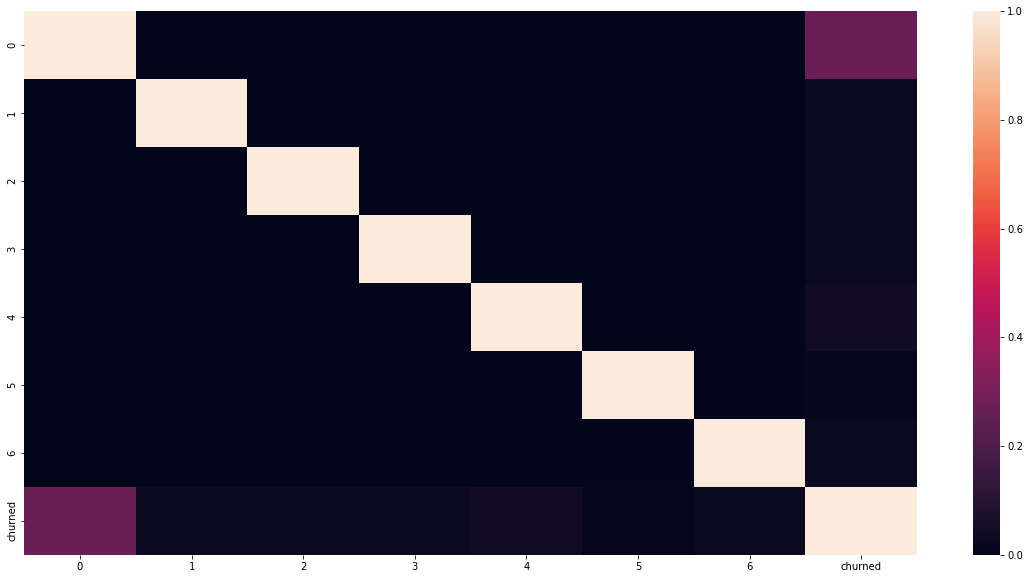

In [110]:
# Checking if any of the components are correlated with each other : We don't expect them to. 
df_pca = pd.concat([pd.DataFrame(X_pca),y_res],axis=1)
df_pca.shape 

plt.figure(figsize=(20,10))
sns.heatmap(df_pca.corr().abs())

## Modelling with PCA Data 

In [113]:
#Train Test Split: Reserve 30% of data for final model testing
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(X_pca), y_res, test_size=0.30, random_state=20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6010, 7) (2576, 7) (6010,) (2576,)


In [125]:
pipe = make_pipeline(PolynomialFeatures(degree=1),RobustScaler(),RandomForestClassifier())
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())

[0.87437604 0.86189684 0.87021631 0.88103161 0.88519135] 0.8745424292845257


In [122]:
# Support vector classification - RBF Kernel 
pipe = make_pipeline(PolynomialFeatures(degree=2),StandardScaler(),SVC(kernel='rbf',C=100))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())

[0.83194676 0.83194676 0.84442596 0.82945092 0.84608985] 0.8367720465890184


In [116]:
#Logistic Regression (No Regularisation)
pipe = make_pipeline(PolynomialFeatures(degree=1), LogisticRegression(penalty='none', solver='lbfgs'))
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")
print(scores, scores.mean())

[0.59484193 0.56572379 0.58069884 0.59400998 0.5640599 ] 0.5798668885191348
